<a href="https://colab.research.google.com/github/AmirMohammadSaffar/FUNDAMENTAL-OF-INTELLIGENT-SYSTEMS/blob/main/miniproject__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**در این بخش سوال 2.1 **

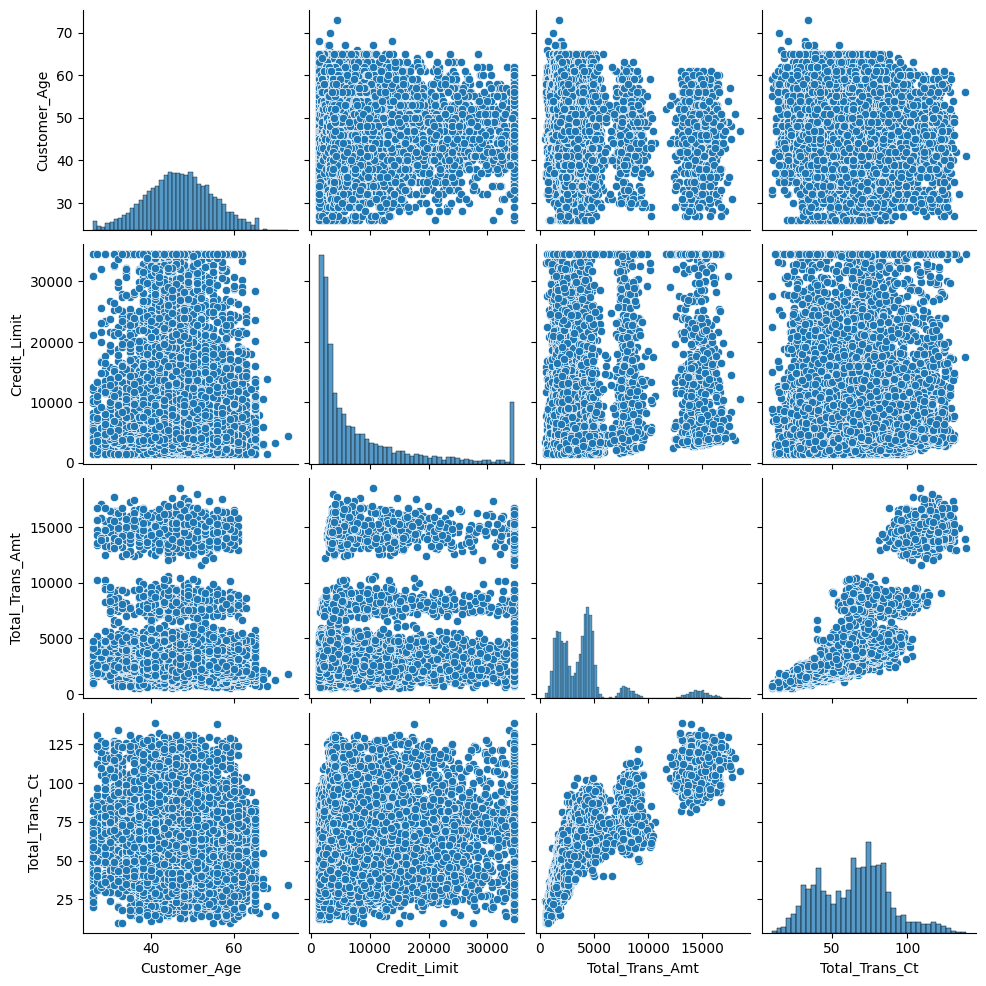

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/mini project one/BankChurners.csv'
bank_data = pd.read_csv(file_path)
selected_columns = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']

sns.pairplot(bank_data[selected_columns])
plt.show()


**در این بخش سوال 3.1**

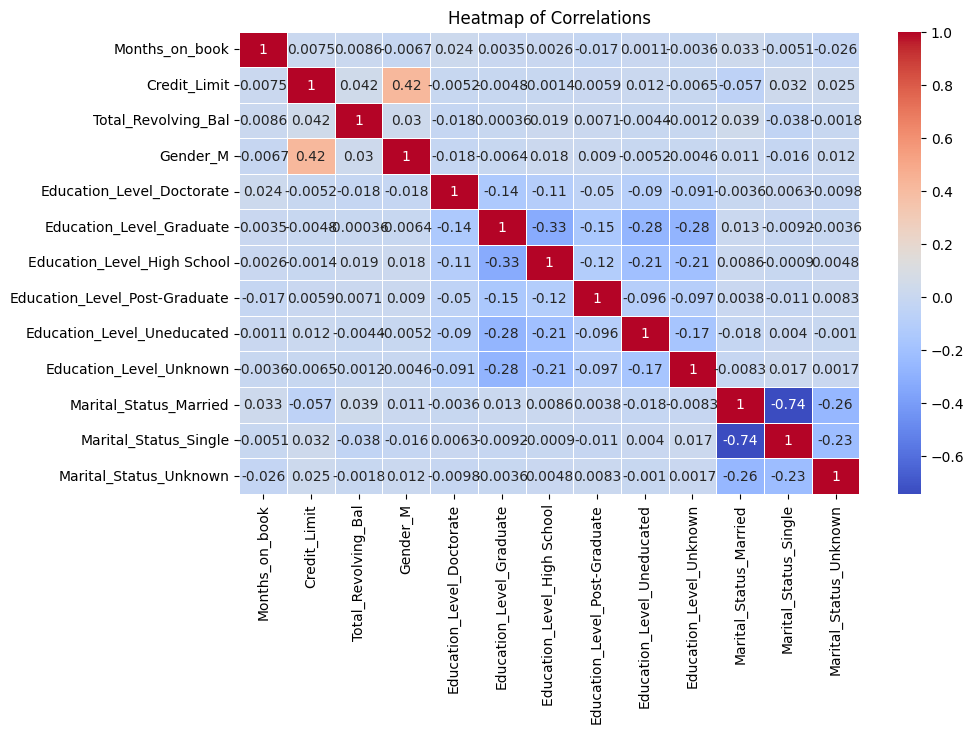

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/mini project one/BankChurners.csv'
bank_data = pd.read_csv(file_path)
selected_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal']
subset_data = bank_data[selected_columns]
subset_data_encoded = pd.get_dummies(subset_data, drop_first=True)
correlation_matrix = subset_data_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap of Correlations")
plt.show()


**در این بخش سوال 4.1**

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/mini project one/BankChurners.csv'
bank_data = pd.read_csv(file_path)
print("Checking for 'unknown' values in the dataset:")

bank_data.replace('Unknown', pd.NA, inplace=True)

nan_summary_after_replace = bank_data.isna().sum()
print("\nNumber of NaN values in each column after replacing 'Unknown':")
print(nan_summary_after_replace)
print("\nDropping rows with NaN values...")
bank_data_cleaned = bank_data.dropna()
print("Rows with NaN values have been dropped.")
print("\nRechecking for NaN values in the dataset after cleaning:")
nan_summary_cleaned = bank_data_cleaned.isna().sum()
print(nan_summary_cleaned)
bank_data_cleaned.to_csv('/content/BankChurners_Cleaned.csv', index=False)



Checking for 'unknown' values in the dataset:

Number of NaN values in each column after replacing 'Unknown':
CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                          

**در این بخش سوال 5.1**

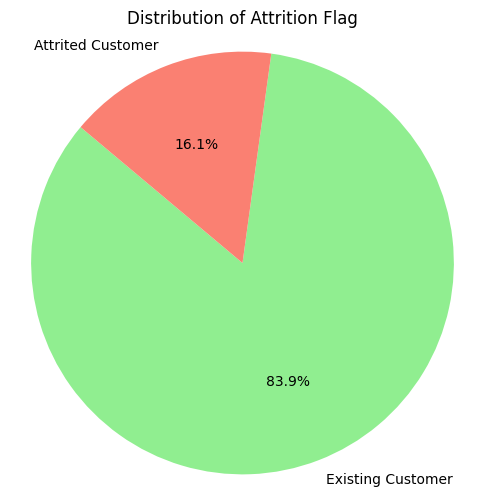

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/mini project one/BankChurners_Cleaned2.csv'
bank_data = pd.read_csv(file_path)

attrition_counts = bank_data['Attrition_Flag'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title("Distribution of Attrition Flag")
plt.axis('equal')
plt.show()


در این بخش سوال 1.6.1
"بدون متعادل سازی"
"LogisticRegression

Classification Report (Validation Data):
                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       230
Existing Customer       0.84      1.00      0.91      1186

         accuracy                           0.84      1416
        macro avg       0.42      0.50      0.46      1416
     weighted avg       0.70      0.84      0.76      1416



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


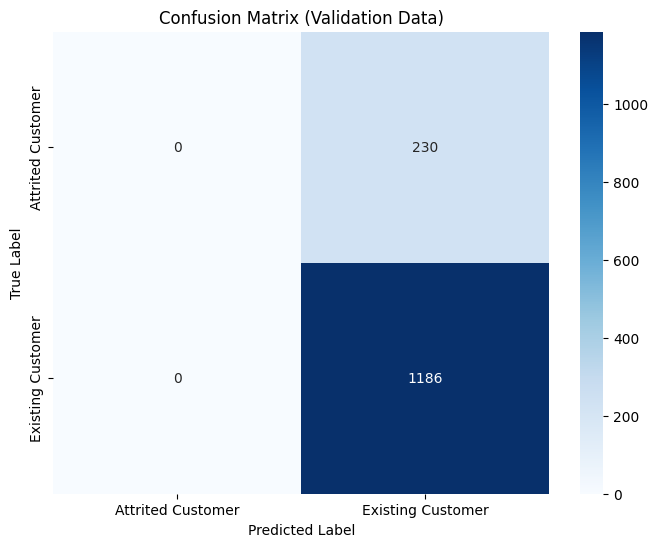

Classification Report (Test Data):
                   precision    recall  f1-score   support

Attrited Customer       1.00      0.00      0.01       203
Existing Customer       0.86      1.00      0.92      1214

         accuracy                           0.86      1417
        macro avg       0.93      0.50      0.47      1417
     weighted avg       0.88      0.86      0.79      1417



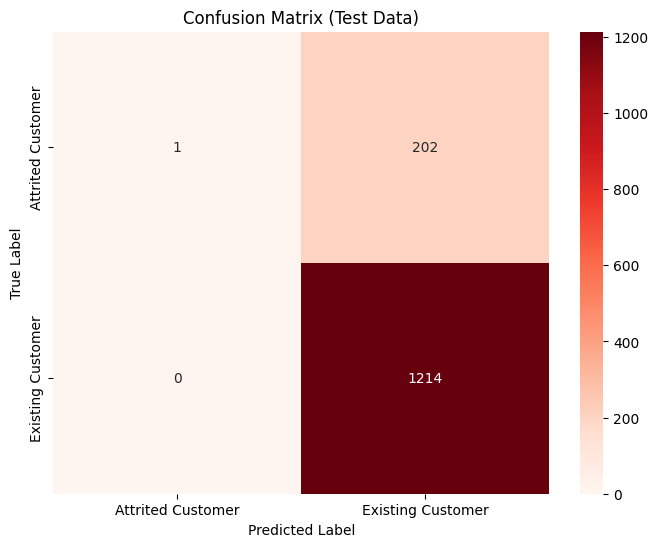

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/mini project one/BankChurners_Cleaned2.csv'
bank_data = pd.read_csv(file_path)

X = bank_data.drop(columns=['Attrition_Flag'])
y = bank_data['Attrition_Flag']


X = pd.get_dummies(X, drop_first=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=83)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=83)
model = LogisticRegression(max_iter=1000, random_state=83)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print("Classification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))


conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Validation Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

y_test_pred = model.predict(X_test)
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Reds', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


در این بخش سوال 1.6.1 "بدون متعادل سازی" "Random Forest

Classification Report (Validation Data):
                   precision    recall  f1-score   support

Attrited Customer       0.88      0.78      0.83       207
Existing Customer       0.96      0.98      0.97      1209

         accuracy                           0.95      1416
        macro avg       0.92      0.88      0.90      1416
     weighted avg       0.95      0.95      0.95      1416



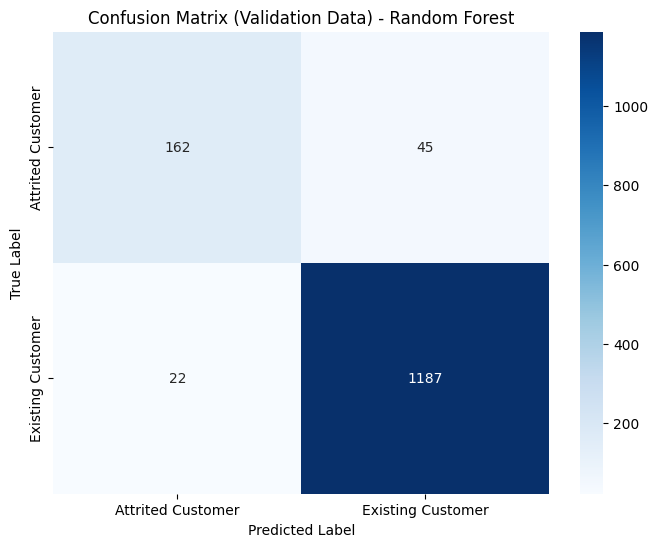

Classification Report (Test Data):
                   precision    recall  f1-score   support

Attrited Customer       0.88      0.71      0.78       211
Existing Customer       0.95      0.98      0.97      1206

         accuracy                           0.94      1417
        macro avg       0.92      0.84      0.88      1417
     weighted avg       0.94      0.94      0.94      1417



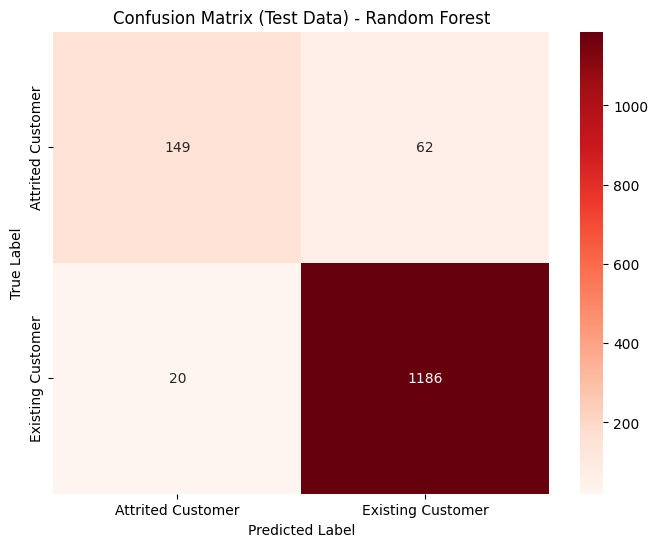

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/mini project one/BankChurners_Cleaned2.csv'
bank_data = pd.read_csv(file_path)

X = bank_data.drop(columns=['Attrition_Flag'])
y = bank_data['Attrition_Flag']

X = pd.get_dummies(X, drop_first=True)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=83)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=83)

model_rf = RandomForestClassifier(n_estimators=100, random_state=83)
model_rf.fit(X_train, y_train)

y_val_pred = model_rf.predict(X_val)

print("Classification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))

conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues', fmt='g', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title("Confusion Matrix (Validation Data) - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

y_test_pred = model_rf.predict(X_test)

print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Reds', fmt='g', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title("Confusion Matrix (Test Data) - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


در این بخش سوال 2.6.1 "با متعادل سازی" "LogisticRegression

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Classification Report (Validation Data):
                   precision    recall  f1-score   support

Attrited Customer       0.70      0.70      0.70      1711
Existing Customer       0.70      0.70      0.70      1689

         accuracy                           0.70      3400
        macro avg       0.70      0.70      0.70      3400
     weighted avg       0.70      0.70      0.70      3400



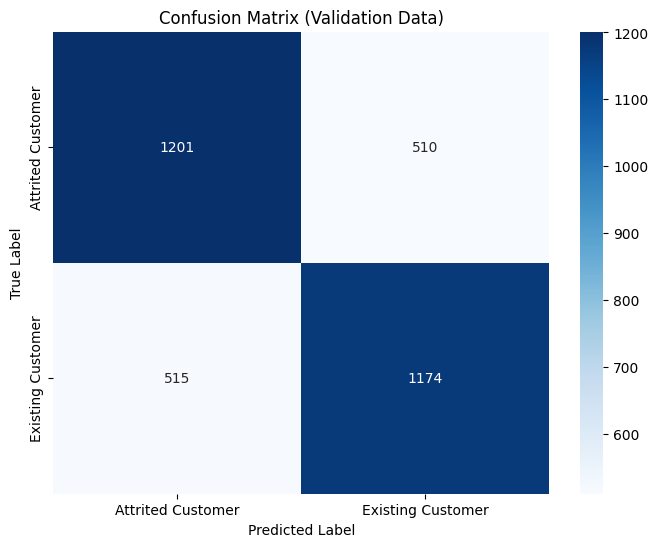

Classification Report (Test Data):
                   precision    recall  f1-score   support

Attrited Customer       0.70      0.69      0.69      1696
Existing Customer       0.69      0.70      0.70      1704

         accuracy                           0.69      3400
        macro avg       0.70      0.69      0.69      3400
     weighted avg       0.70      0.69      0.69      3400



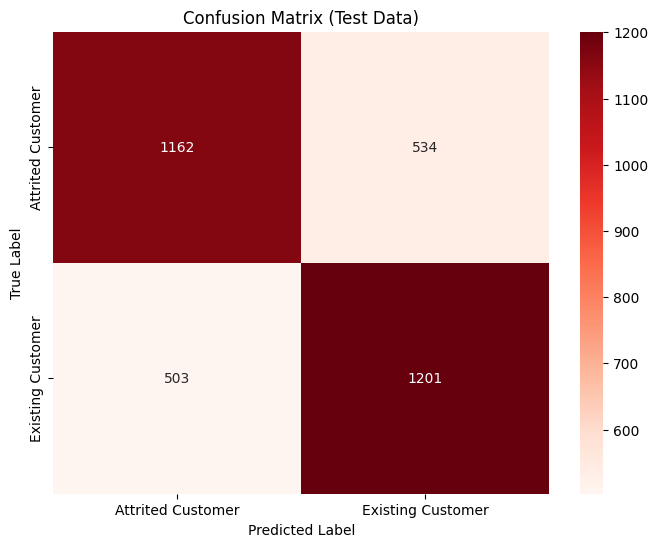

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/mini project one/BankChurners_Cleaned2.csv')
print(df['Attrition_Flag'].value_counts())
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

X = pd.get_dummies(X, drop_first=True)

smote = SMOTE(random_state=83)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=83)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=83)

model = LogisticRegression(max_iter=1000, random_state=83)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

print("Classification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Validation Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

y_test_pred = model.predict(X_test)
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Reds', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

در این بخش سوال 2.6.1 "با متعادل سازی" "Random Forest

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Classification Report (Validation Data):
                   precision    recall  f1-score   support

Attrited Customer       0.97      0.97      0.97      1711
Existing Customer       0.97      0.97      0.97      1689

         accuracy                           0.97      3400
        macro avg       0.97      0.97      0.97      3400
     weighted avg       0.97      0.97      0.97      3400



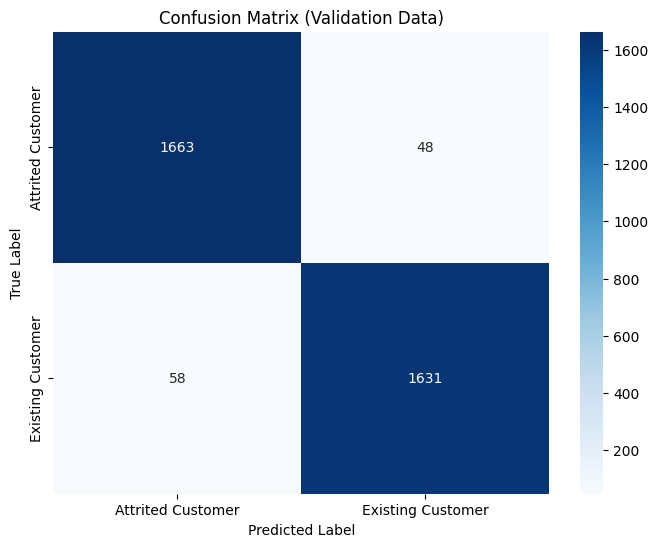

Classification Report (Test Data):
                   precision    recall  f1-score   support

Attrited Customer       0.97      0.97      0.97      1696
Existing Customer       0.97      0.97      0.97      1704

         accuracy                           0.97      3400
        macro avg       0.97      0.97      0.97      3400
     weighted avg       0.97      0.97      0.97      3400



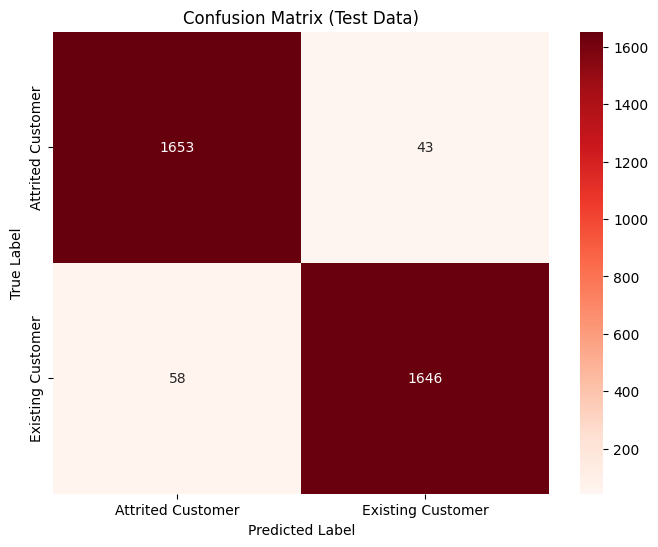

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/mini project one/BankChurners_Cleaned2.csv')
print(df['Attrition_Flag'].value_counts())
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']
X = pd.get_dummies(X, drop_first=True)

smote = SMOTE(random_state=83)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=83)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=83)

model = RandomForestClassifier(n_estimators=100, random_state=83)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

print("Classification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Validation Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
y_test_pred = model.predict(X_test)
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Reds', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


در این بخش امتیازی

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


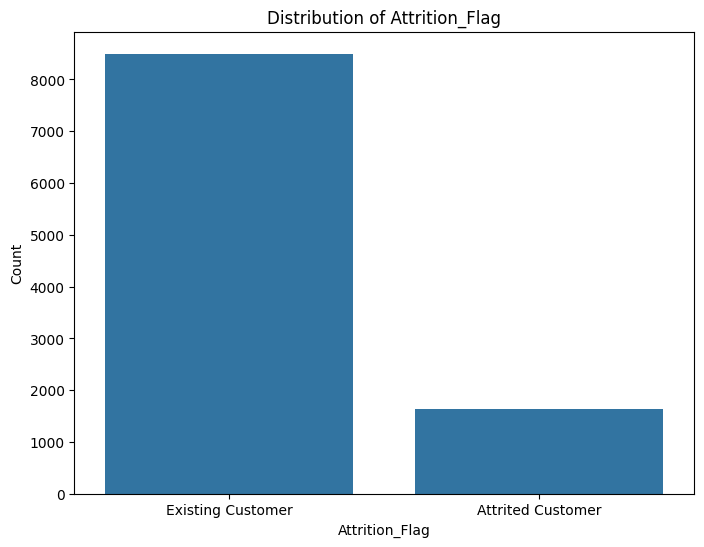

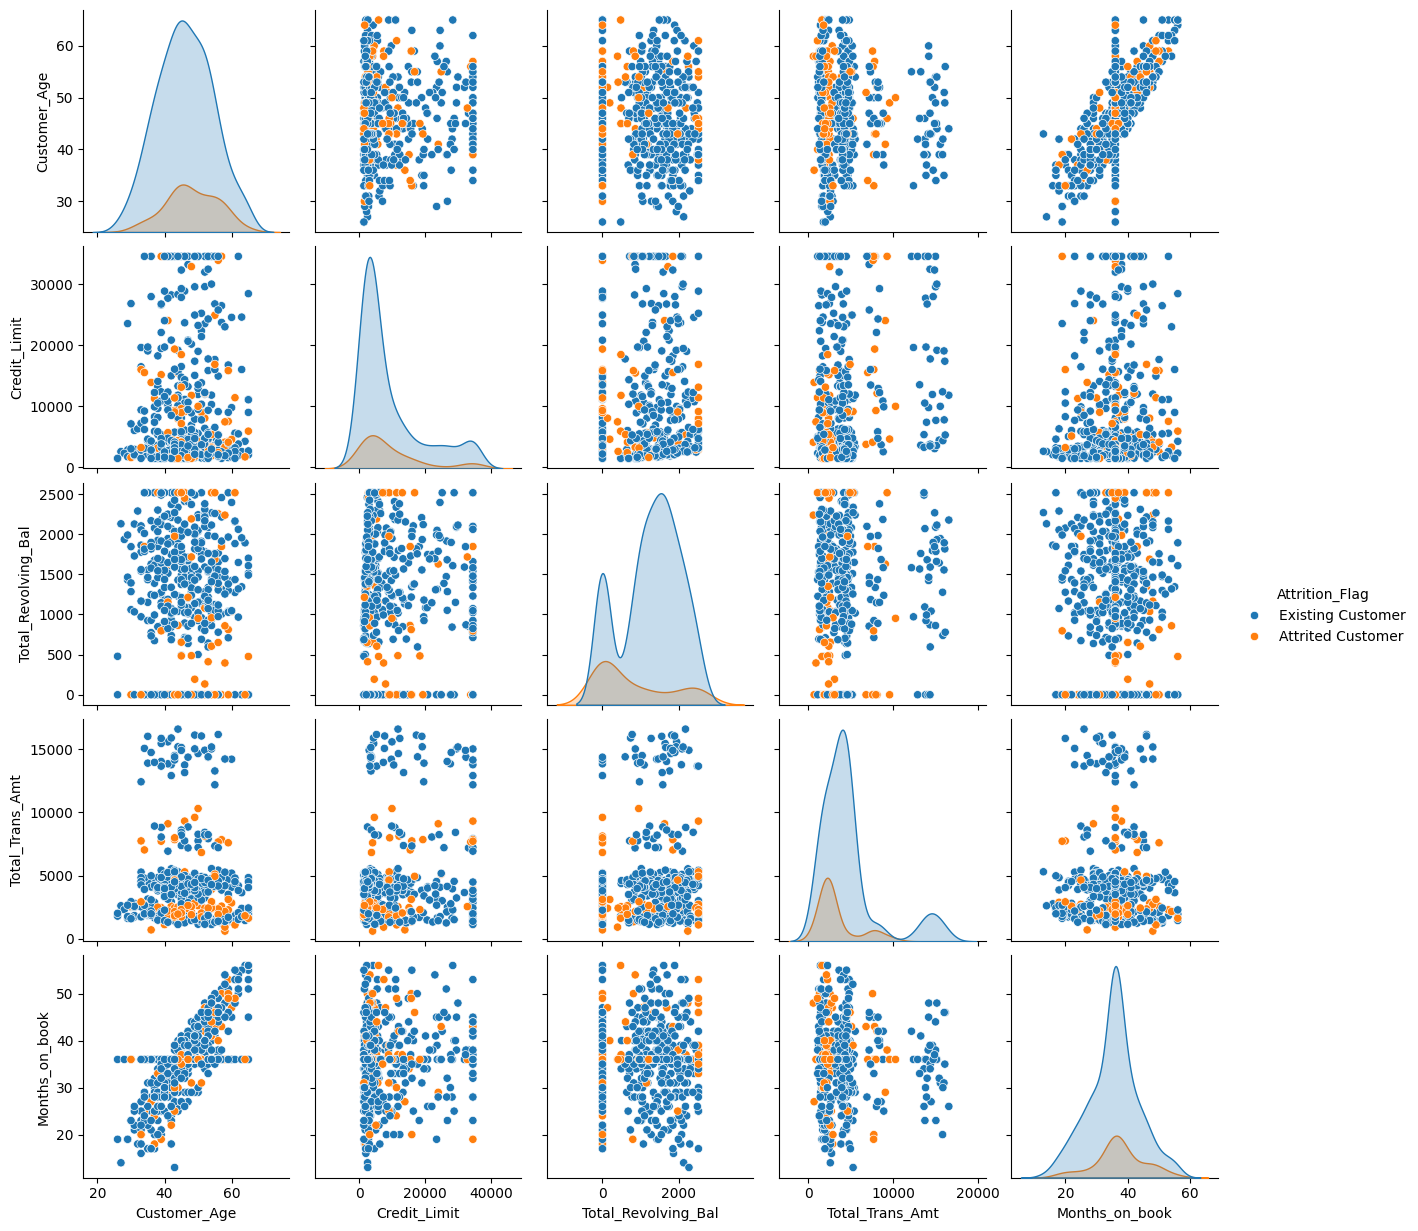

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/mini project one/BankChurners_Cleaned2.csv')

print(df['Attrition_Flag'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attrition_Flag')
plt.title("Distribution of Attrition_Flag")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.show()

X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

X = pd.get_dummies(X, drop_first=True)
df_sampled = df.sample(n=500, random_state=83)
pairplot_features = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Months_on_book', 'Attrition_Flag']
sns.pairplot(df_sampled[pairplot_features], hue='Attrition_Flag')
plt.show()


سوال دوم

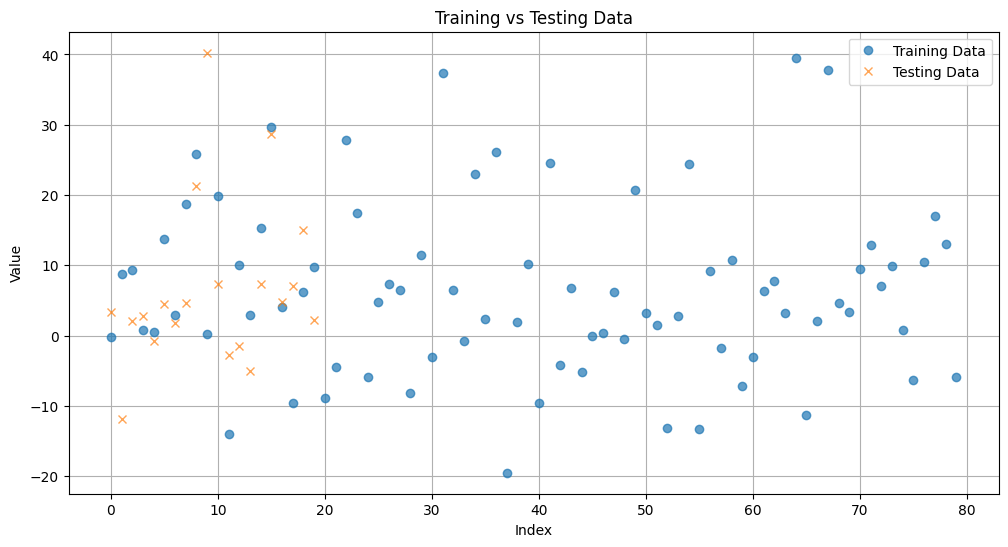

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_path = '/content/drive/MyDrive/mini project one/data.npy'
data = np.load(data_path)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

plt.figure(figsize=(12, 6))

plt.plot(train_data, 'o', label='Training Data', alpha=0.7)

plt.plot(test_data, 'x', label='Testing Data', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Training vs Testing Data')
plt.legend()
plt.grid(True)
plt.show()

در این بخش سوال 3.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

data_path = '/content/drive/MyDrive/mini project one/data.npy'
data = np.load(data_path)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=83)

train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

model = LinearRegression()
model.fit(train_data, train_data)

predictions = model.predict(test_data)

mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = math.sqrt(mean_squared_error(test_data, predictions))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")



Mean Squared Error (MSE): 7.706647191064411e-30
Mean Absolute Error (MAE): 2.1288526497187377e-15
Root Mean Squared Error (RMSE): 2.7760848674102906e-15


در این بخش سوال 4.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

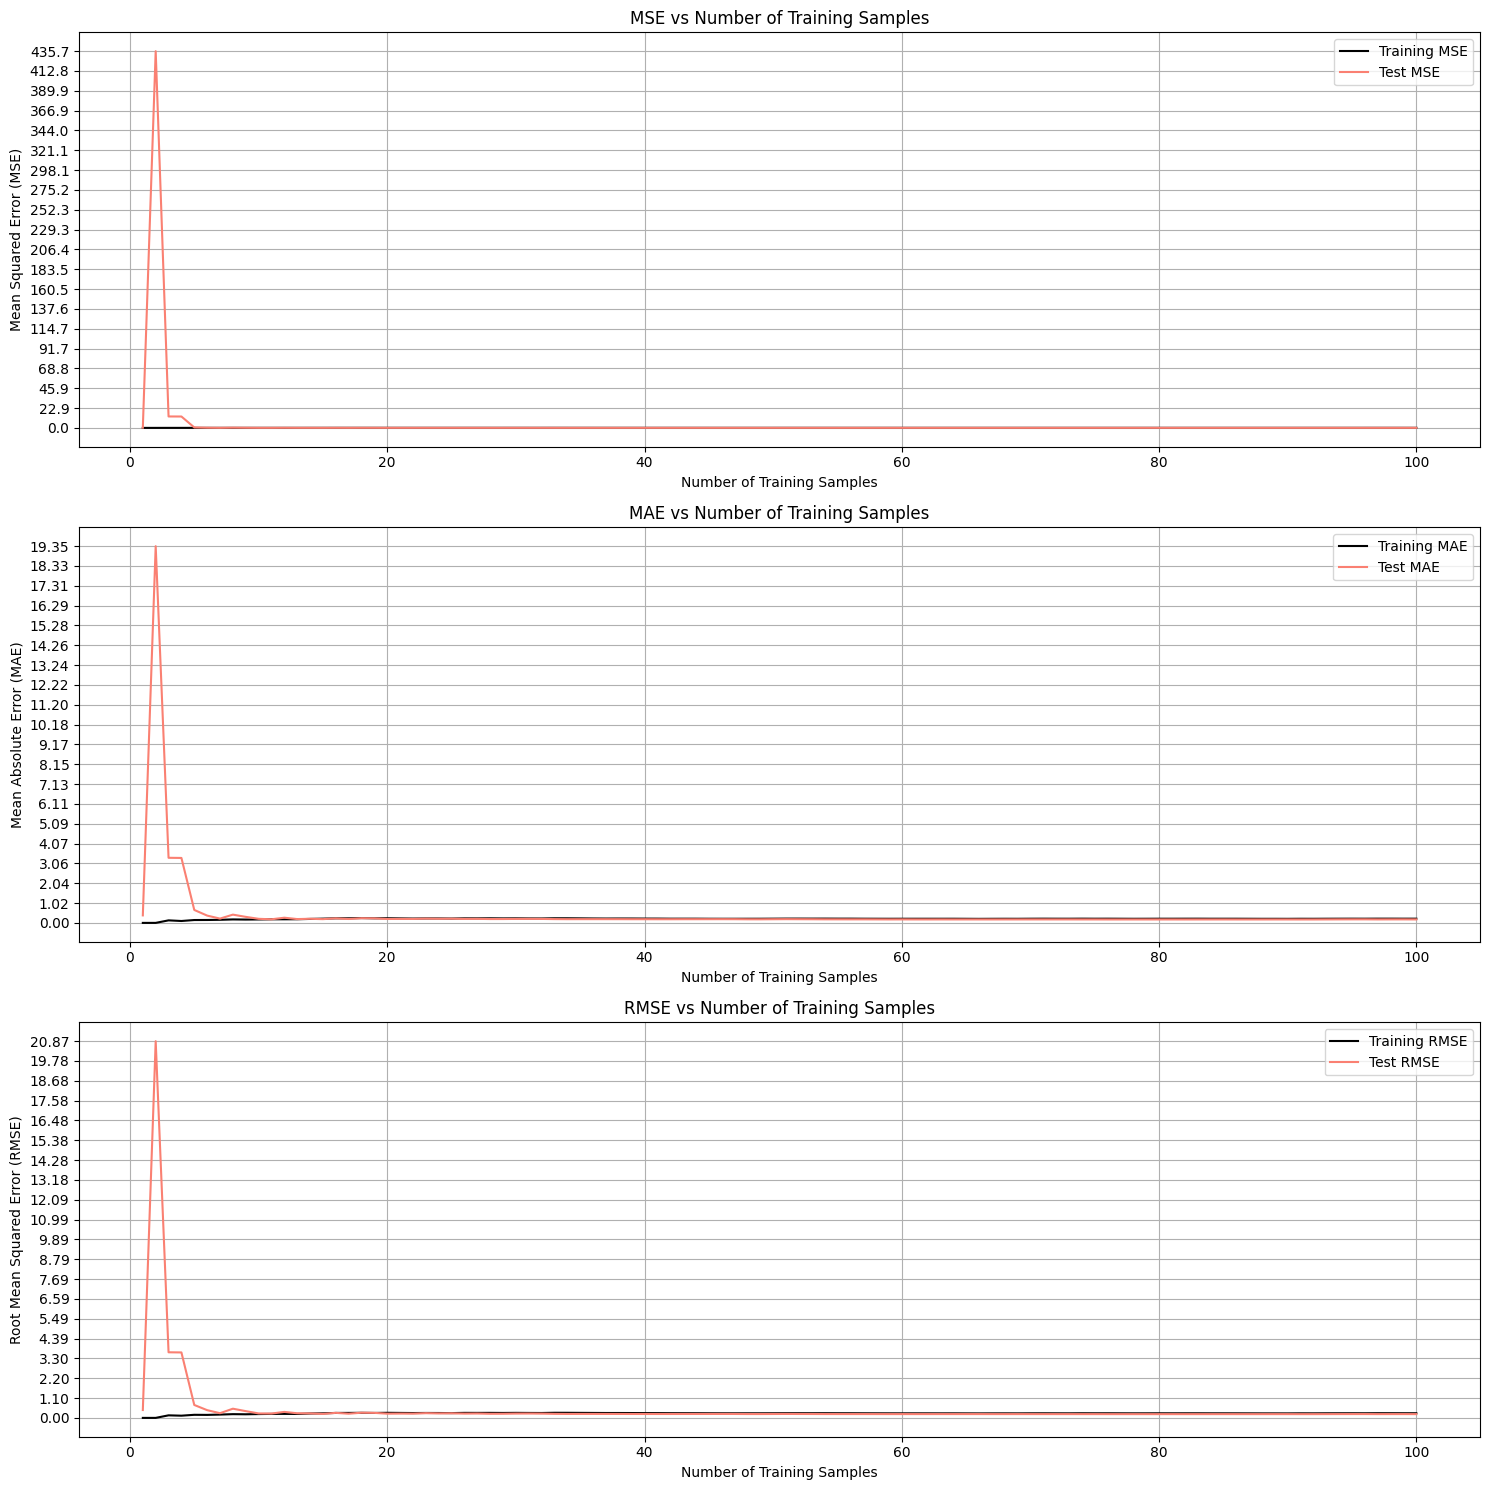

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

data = np.load('/content/drive/MyDrive/mini project one/data.npy')

X = data.reshape(-1, 1)
y = np.random.rand(len(data))


X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=83)


train_mse = []
test_mse = []
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []


num_samples = len(X)
for i in range(1, num_samples + 1):
    X_train = X[:i]
    y_train = y[:i]

    model = LinearRegression()
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_mse_val = mean_squared_error(y_train, y_train_pred)
    test_mse_val = mean_squared_error(y_test, y_test_pred)

    train_mae_val = mean_absolute_error(y_train, y_train_pred)
    test_mae_val = mean_absolute_error(y_test, y_test_pred)

    train_rmse_val = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse_val = mean_squared_error(y_test, y_test_pred, squared=False)

    train_mse.append(train_mse_val)
    test_mse.append(test_mse_val)
    train_mae.append(train_mae_val)
    test_mae.append(test_mae_val)
    train_rmse.append(train_rmse_val)
    test_rmse.append(test_rmse_val)

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.plot(range(1, num_samples + 1), train_mse, label='Training MSE', color='black')
plt.plot(range(1, num_samples + 1), test_mse, label='Test MSE', color='salmon')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Number of Training Samples')
plt.legend()
plt.grid()
plt.yticks(np.linspace(min(min(train_mse), min(test_mse)), max(max(train_mse), max(test_mse)), 20))


plt.subplot(3, 1, 2)
plt.plot(range(1, num_samples + 1), train_mae, label='Training MAE', color='black')
plt.plot(range(1, num_samples + 1), test_mae, label='Test MAE', color='salmon')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Training Samples')
plt.legend()
plt.grid()
plt.yticks(np.linspace(min(min(train_mae), min(test_mae)), max(max(train_mae), max(test_mae)), 20))

plt.subplot(3, 1, 3)
plt.plot(range(1, num_samples + 1), train_rmse, label='Training RMSE', color='black')
plt.plot(range(1, num_samples + 1), test_rmse, label='Test RMSE', color='salmon')
plt.xlabel('Number of Training Samples')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Number of Training Samples')
plt.legend()
plt.grid()
plt.yticks(np.linspace(min(min(train_rmse), min(test_rmse)), max(max(train_rmse), max(test_rmse)), 20))

plt.tight_layout()
plt.show()


در این بخش سوال 6.2

Degree: 1
Mean Squared Error (MSE): 5.818311399191615e-30
Mean Absolute Error (MAE): 1.784683512084939e-15
Root Mean Squared Error (RMSE): 2.4121176171968927e-15

Degree: 2
Mean Squared Error (MSE): 5.188765576011853e-27
Mean Absolute Error (MAE): 5.102029909664907e-14
Root Mean Squared Error (RMSE): 7.203308667558161e-14

Degree: 3
Mean Squared Error (MSE): 2.9870047498741198e-24
Mean Absolute Error (MAE): 1.0128564653655303e-12
Root Mean Squared Error (RMSE): 1.7282953306290333e-12

Degree: 4
Mean Squared Error (MSE): 4.6783131487273504e-21
Mean Absolute Error (MAE): 3.62856134028533e-11
Root Mean Squared Error (RMSE): 6.83981955078301e-11

Degree: 5
Mean Squared Error (MSE): 1.813692318439064e-18
Mean Absolute Error (MAE): 8.454797667534208e-10
Root Mean Squared Error (RMSE): 1.3467339449345829e-09



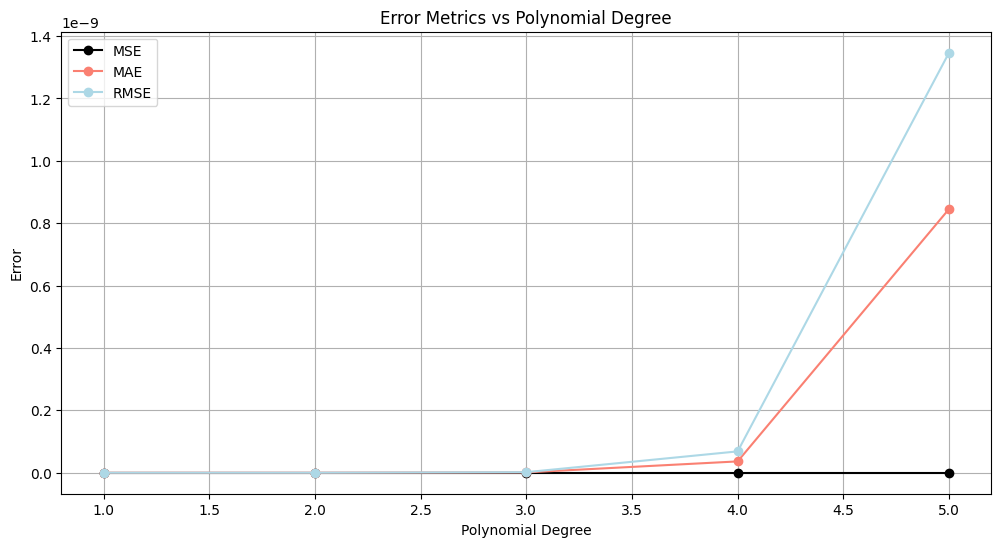

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

data_path = '/content/drive/MyDrive/mini project one/data.npy'
data = np.load(data_path)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=83)

train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

degrees = [1, 2, 3, 4, 5]
mse_list = []
mae_list = []
rmse_list = []

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(train_data)
    X_test_poly = poly.transform(test_data)


    model = LinearRegression()
    model.fit(X_train_poly, train_data)


    predictions = model.predict(X_test_poly)


    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    rmse = math.sqrt(mean_squared_error(test_data, predictions))


    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)


    print(f"Degree: {degree}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}\n")


plt.figure(figsize=(12, 6))
plt.plot(degrees, mse_list, marker='o', label='MSE', color='black')
plt.plot(degrees, mae_list, marker='o', label='MAE', color='salmon')
plt.plot(degrees, rmse_list, marker='o', label='RMSE', color='lightblue')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Error Metrics vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


در این بخش سوال 7.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Linear Regression
Mean Squared Error (MSE): 7.706647191064411e-30
Mean Absolute Error (MAE): 2.1288526497187377e-15
Root Mean Squared Error (RMSE): 2.7760848674102906e-15

Model: Ridge Regression
Mean Squared Error (MSE): 4.369701676754234e-05
Mean Absolute Error (MAE): 0.005316014598631097
Root Mean Squared Error (RMSE): 0.0066103719084135

Model: Decision Tree Regressor
Mean Squared Error (MSE): 0.1819249022455641
Mean Absolute Error (MAE): 0.3304936733866032
Root Mean Squared Error (RMSE): 0.4265265551469968



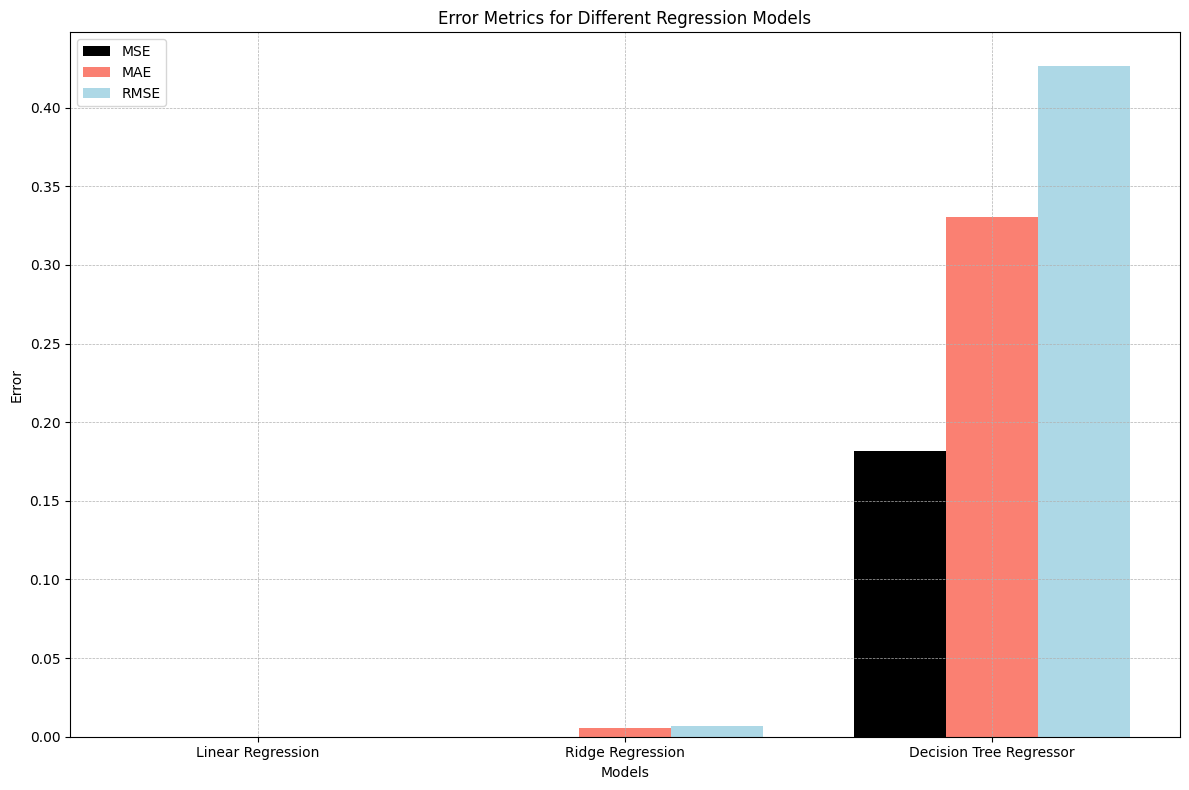

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

data_path = '/content/drive/MyDrive/mini project one/data.npy'
data = np.load(data_path)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=83)

train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=5.0),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=20, random_state=42)
}

model_names = []
mse_list = []
mae_list = []
rmse_list = []

for model_name, model in models.items():
    model.fit(train_data, train_data)
    predictions = model.predict(test_data)

    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    rmse = mean_squared_error(test_data, predictions, squared=False)


    model_names.append(model_name)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}\n")


x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, mse_list, width, label='MSE', color='black')
rects2 = ax.bar(x, mae_list, width, label='MAE', color='salmon')
rects3 = ax.bar(x + width, rmse_list, width, label='RMSE', color='lightblue')

ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('Error Metrics for Different Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

fig.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
